In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import math
from sklearn.preprocessing import normalize
from functools import partial

**Exercise 1.10**

In [ ]:
def flip_coins(total_coins):
    hts = np.zeros(total_coins)
    probs = np.random.uniform(size=total_coins)
    hts[probs > 0.5] = 1
    return hts

def run_once(total_coins, total_flips, print_freq = False):
    v1, vrand, vmin = None, None, None
    crand = np.random.choice(total_coins)
    hts_sum = np.zeros(total_coins) # store the sum of heads in total_flips

    for flip in range(total_flips):
        hts_sum = hts_sum + flip_coins(total_coins)

    hts_freq = hts_sum/total_flips

    v1 = hts_freq[0]
    vrand = hts_freq[crand]
    cmin = np.argmin(hts_sum)
    vmin = hts_freq[cmin]

    if print_freq:
        print('Frequency of first coin: {}'.format(v1))
        print('Frequency of a random coin: id({})-freq({})'.format(crand, vrand))
        print('Frequency of the coin with minimum frequency: id({})-freq({})'.format(cmin, vmin))
    return v1,vrand,vmin

**Q 1.10 (a)**

In [ ]:
# Exercise 1.10 (a)
total_coins = 1000
total_flips = 10
run_once(total_coins, total_flips, True)

Frequency of first coin: 0.5
Frequency of a random coin: id(720)-freq(0.5)
Frequency of the coin with minimum frequency: id(15)-freq(0.1)


(0.5, 0.5, 0.1)

(array([6.22911e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        3.77069e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+01]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ]),
 <BarContainer object of 10 artists>)

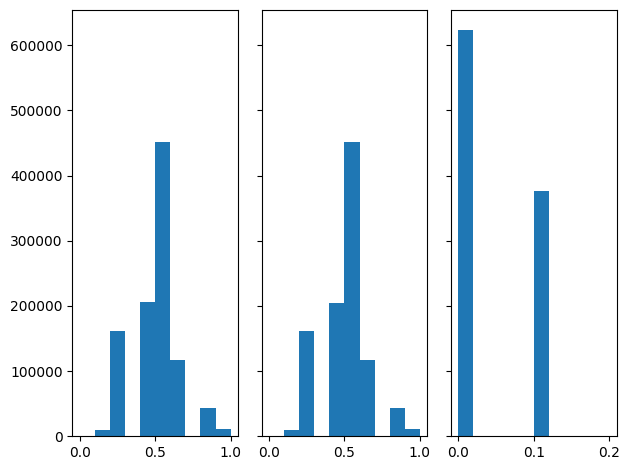

In [ ]:
# Exercise 1.10 (b)
total_coins = 1000
total_flips = 10
total_runs = 1000000
v1s, vrands, vmins = [],[],[]
for run in range(total_runs):
    v1,vrand,vmin = run_once(total_coins, total_flips)
    v1s.append(v1)
    vrands.append(vrand)
    vmins.append(vmin)

fig, axs = plt.subplots(1,3,sharey=True, tight_layout=True)
n_bins = 10
axs[0].hist(v1s,bins=n_bins)
axs[1].hist(vrands,bins=n_bins)
axs[2].hist(vmins,bins=n_bins)

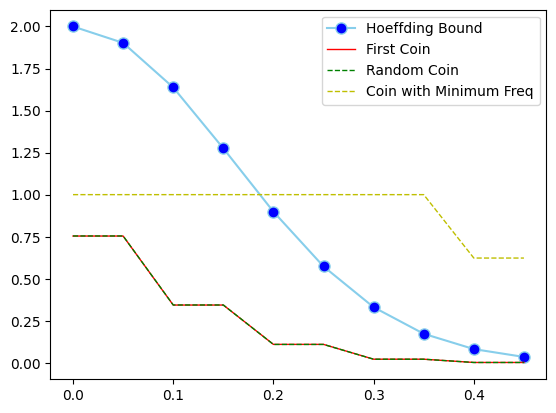

In [ ]:
# Exercise 1.10 (c)
def hoeffding_bound(epsilon, n):
    return 2.0*np.exp(-2.0*n*epsilon**2)

eps = np.arange(0.0,0.5,0.05)
bounds = hoeffding_bound(eps, total_flips)
v1s, vrands, vmins = np.array(v1s), np.array(vrands), np.array(vmins)
v1d = np.abs(v1s-0.5)
vrandd = np.abs(vrands-0.5)
vmind = np.abs(vmins-0.5)

p1, prand, pmin = np.zeros(len(eps)),np.zeros(len(eps)),np.zeros(len(eps))

for idx in range(eps.shape[0]):
    ep = eps[idx]
    p1[idx] = np.sum(v1d > ep)/total_runs
    prand[idx] = np.sum(vrandd > ep)/total_runs
    pmin[idx] = np.sum(vmind > ep)/total_runs

#plt.ylim((0,0.01))
plt.plot(eps, bounds, marker='o', markerfacecolor='blue', markersize=8, color='skyblue', label='Hoeffding Bound')
plt.plot(eps, p1, marker='', color='r', linewidth=1, label='First Coin')
plt.plot(eps, prand, marker='', color='g', linewidth=1, linestyle='dashed', label='Random Coin')
plt.plot(eps, pmin, marker='', color='y', linewidth=1, linestyle='dashed', label='Coin with Minimum Freq')
plt.legend()

**Problem 1.4 (a)**

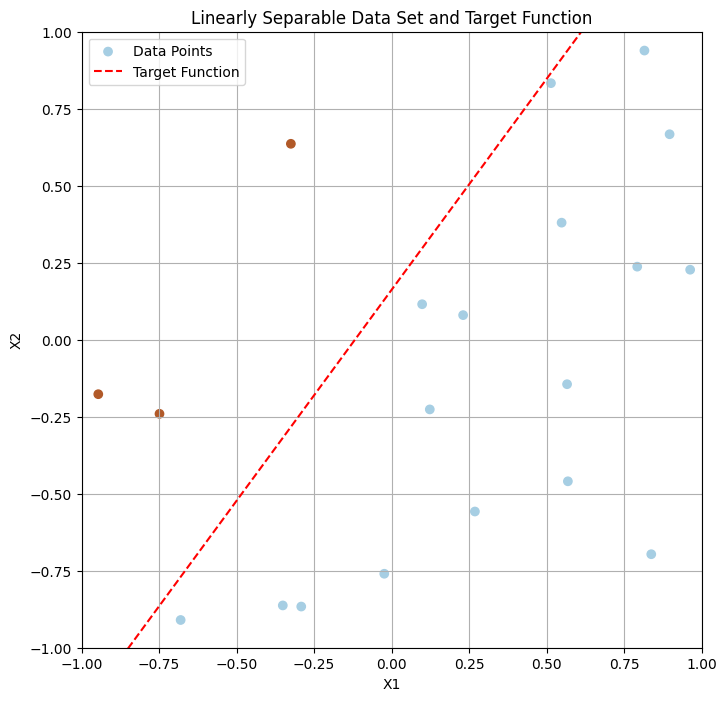

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generating a target function
def generate_target_function():
    p1 = np.random.uniform(-1, 1, 2)
    p2 = np.random.uniform(-1, 1, 2)
    # Compute line parameters (y = mx + c)
    m = (p2[1] - p1[1]) / (p2[0] - p1[0])
    c = p1[1] - m * p1[0]
    return m, c

# Generating dataset and evaluating target function
def generate_data_set(size, m, c):
    X = np.random.uniform(-1, 1, (size, 2))
    Y = np.sign(X[:, 1] - (m * X[:, 0] + c))
    return X, Y

# Plotting the dataset and target function
def plot_data_set(X, Y, m, c):
    plt.figure(figsize=(8, 8))
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, marker='o', label='Data Points')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel('X1')
    plt.ylabel('X2')

    # Plotting the target function
    x_vals = np.array([-1, 1])
    y_vals = m * x_vals + c
    plt.plot(x_vals, y_vals, 'r--', label='Target Function')

    plt.title('Linearly Separable Data Set and Target Function')
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    # Generate target function
    m, c = generate_target_function()

    # Generate dataset
    X, Y = generate_data_set(20, m, c)

    # Plot dataset and target function
    plot_data_set(X, Y, m, c)

if __name__ == "__main__":
    main()

**Problem 1.4 (b)**

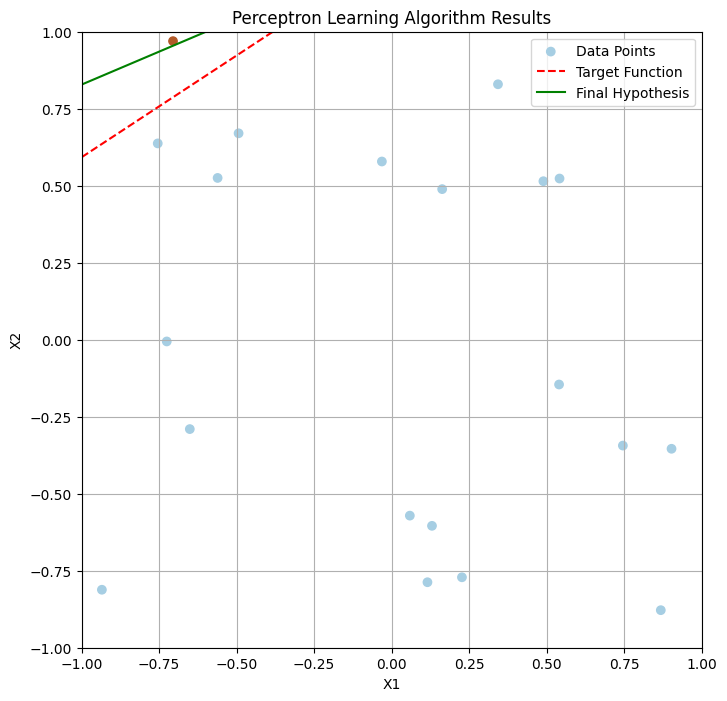

Number of updates before convergence: 17


In [ ]:
# Perceptron learning algorithm
def perceptron_learning(X, Y, max_iter=1000):
    N, d = X.shape
    w = np.zeros(d)
    num_updates = 0

    for _ in range(max_iter):
        misclassified = False
        for i in range(N):
            if Y[i] * np.dot(w, X[i]) <= 0:
                w += Y[i] * X[i]
                num_updates += 1
                misclassified = True
        if not misclassified:
            break

    return w, num_updates

# Plotting the dataset, target function, and final hypothesis
def plot_results(X, Y, m, c, w):
    plt.figure(figsize=(8, 8))

    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, marker='o', label='Data Points')

    # Plot target function
    x_vals = np.array([-1, 1])
    y_vals = m * x_vals + c
    plt.plot(x_vals, y_vals, 'r--', label='Target Function')

    # Plot final hypothesis
    if w[1] != 0:
        plt.plot(x_vals, -(w[0]*x_vals + w[2]) / w[1], 'g-', label='Final Hypothesis')

    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Perceptron Learning Algorithm Results')
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    # Generate target function
    m, c = generate_target_function()

    # Generate dataset
    X, Y = generate_data_set(20, m, c)

    # Run perceptron learning algorithm
    w, num_updates = perceptron_learning(np.hstack((X, np.ones((X.shape[0], 1)))), Y)

    # Plot results
    plot_results(X, Y, m, c, w)

    print("Number of updates before convergence:", num_updates)

if __name__ == "__main__":
    main()

**Problem 1.4 (c)**

Results for dataset 1:


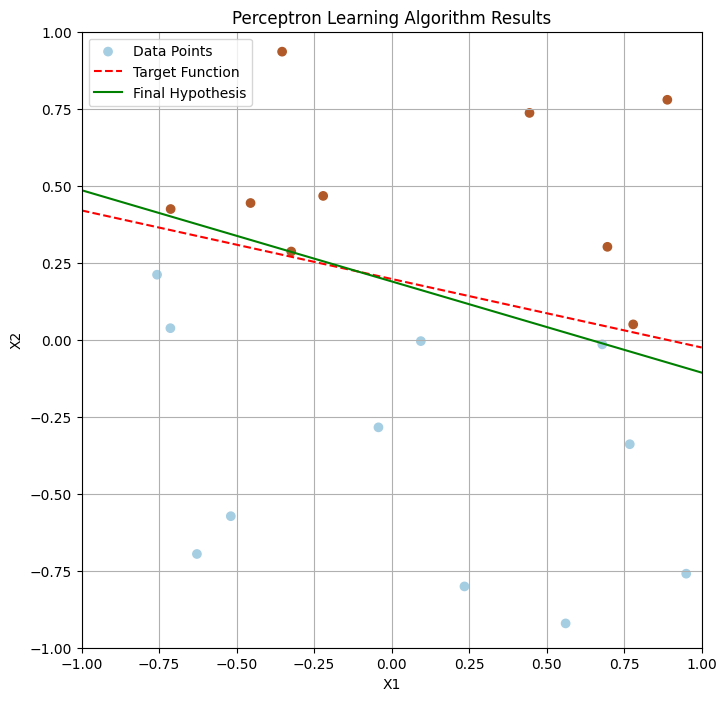

Number of updates before convergence: 41


In [ ]:
def main():
    # Generate target function
    m, c = generate_target_function()

    # Generate data set
    X, Y = generate_data_set(20, m, c)

    # Run perceptron learning algorithm
    w, num_updates = perceptron_learning(np.hstack((X, np.ones((X.shape[0], 1)))), Y)

    # Plot results
    plot_results(X, Y, m, c, w)

    print("Number of updates before convergence:", num_updates)

if __name__ == "__main__":
    print("Results for dataset 1:")
    main()

**Problem 1.4 (d)**

Results for dataset 1:


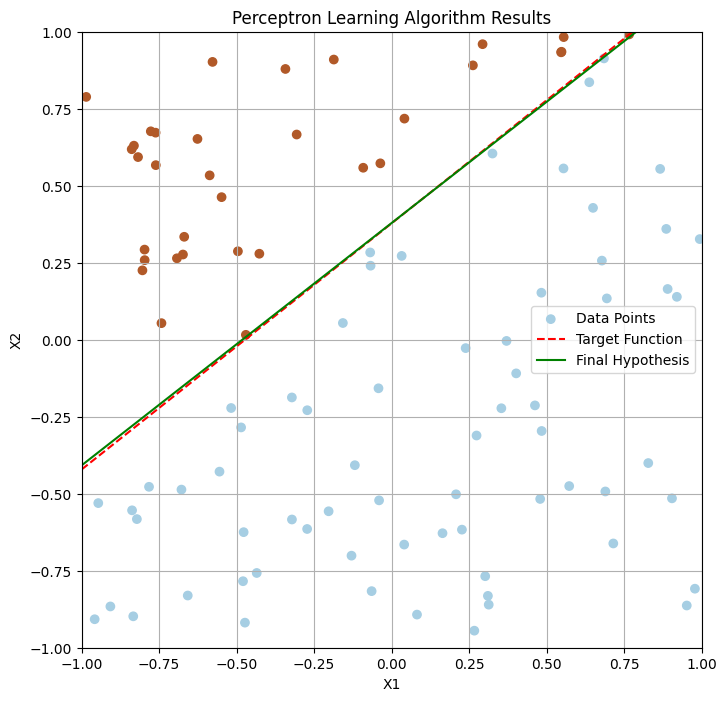

Number of updates before convergence: 185


In [ ]:
def main():
    # Generate target function
    m, c = generate_target_function()

    # Generate data set
    X, Y = generate_data_set(100, m, c)

    # Run perceptron learning algorithm
    w, num_updates = perceptron_learning(np.hstack((X, np.ones((X.shape[0], 1)))), Y)

    # Plot results
    plot_results(X, Y, m, c, w)

    print("Number of updates before convergence:", num_updates)

if __name__ == "__main__":
    print("Results for dataset 1:")
    main()

**Problem 1.4 (e)**

Results for dataset 1:


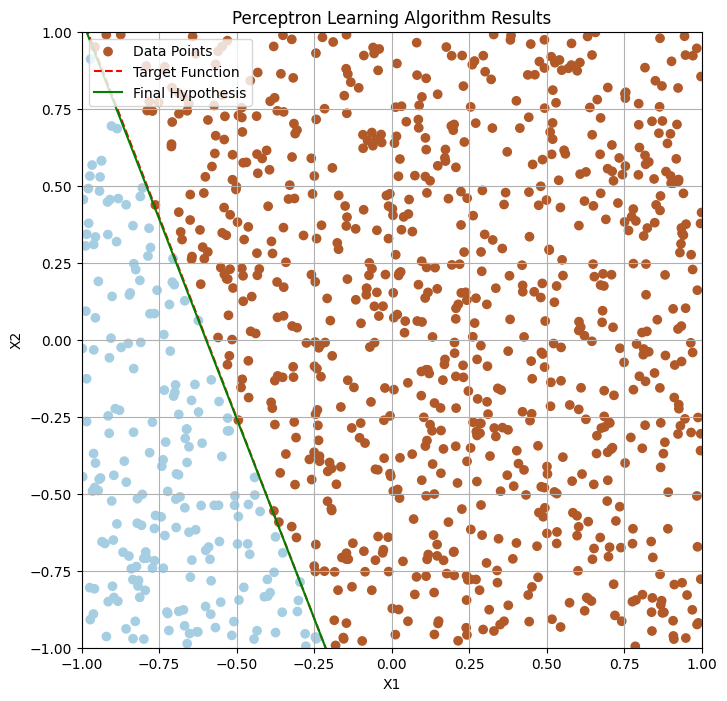

Number of updates before convergence: 694


In [ ]:
def main():
    # Generate target function
    m, c = generate_target_function()

    # Generate data set
    X, Y = generate_data_set(1000, m, c)

    # Run perceptron learning algorithm
    w, num_updates = perceptron_learning(np.hstack((X, np.ones((X.shape[0], 1)))), Y)

    # Plot results
    plot_results(X, Y, m, c, w)

    print("Number of updates before convergence:", num_updates)

if __name__ == "__main__":
    print("Results for dataset 1:")
    main()

**Problem  1.7**

For µ = 0.05:
N = 1: Probability of at least one coin with v = 0: 0.050000000000000044
N = 1000: Probability of at least one coin with v = 0: 1.0
N = 100000: Probability of at least one coin with v = 0: 1.0
For µ = 0.8:
N = 1: Probability of at least one coin with v = 0: 0.8
N = 1000: Probability of at least one coin with v = 0: 1.0
N = 100000: Probability of at least one coin with v = 0: 1.0


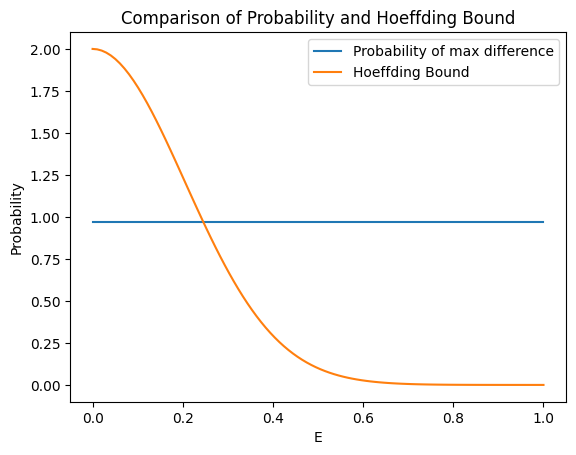

In [ ]:
def probability_of_v_equals_0(mu, N):
    return 1 - (1 - mu) ** N

def hoeffding_bound(N, E):
    return 2 * np.exp(-2 * N * E ** 2)

# (a)
N_values = [1, 1000, 100000]
mu_values = [0.05, 0.8]

for mu in mu_values:
    print(f"For µ = {mu}:")
    for N in N_values:
        prob_v_equals_0 = probability_of_v_equals_0(mu, N)
        print(f"N = {N}: Probability of at least one coin with v = 0: {prob_v_equals_0}")

# (b)
N = 6
E_values = np.linspace(0, 1, 100)
mu = 0.5
num_coins = 2

prob_max_difference = []
hoeffding_bounds = []

for E in E_values:
    prob_max = 1 - (1 - mu) ** N - (1 - mu) ** N
    prob_max_difference.append(prob_max)
    hoeffding_bounds.append(hoeffding_bound(N, E))

plt.plot(E_values, prob_max_difference, label="Probability of max difference")
plt.plot(E_values, hoeffding_bounds, label="Hoeffding Bound")
plt.xlabel("E")
plt.ylabel("Probability")
plt.title("Comparison of Probability and Hoeffding Bound")
plt.legend()
plt.show()